In [5]:
#input convolutional network accepts 2-dim and 3-dim -
#kernel size - 3x3
#sliding window principle 
#polling principle - e.g  max pooling  
#multiple layers - 3-4-5. 
#cats vs dogs 

#cats vs dogs microsoft datasets
#https://www.microsoft.com/en-us/download/details.aspx?id=54765

import os
import cv2
import numpy as np
from tqdm import tqdm

#flag for preprocessing / alternative seperate
REBUILD_DATA = True



In [28]:


class DogsVSCats():
    IMG_SIZE=50
    CATS = "PetImages/Cat"
    DOGS = "PetImages/Dog"
    LABELS = {CATS: 0, DOGS: 1} # we should one hot encode this
    training_data = []
    catcount = 0
    dogcount = 0
    
    def make_training_data(self):
        for label in self.LABELS:
            print(label)
            
            #list over directory
            for f in tqdm(os.listdir(label)):
                try:
                    path = os.path.join(label, f)
                    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
                    img = cv2.resize(img, (self.IMG_SIZE, self.IMG_SIZE))
                    self.training_data.append([np.array(img), np.eye(2)[self.LABELS[label]]])
                        
                    if label == self.CATS:
                        self.catcount +=1
                    elif label == self.DOGS:
                        self.dogcount +=1
                except Exception as e:
                    #print(e)
                    pass
                
        
        np.random.shuffle(self.training_data)
        np.save("training_data.npy", self.training_data)
        print("Cats:", self.catcount)
        print("Dogs:",self.dogcount)


In [29]:
if REBUILD_DATA:
    dogsvcats = DogsVSCats()
    dogsvcats.make_training_data()




  1%|          | 88/12501 [00:00<00:14, 876.59it/s]

PetImages/Cat


  1%|          | 66/12501 [00:00<00:19, 651.81it/s]

PetImages/Dog


100%|██████████| 12501/12501 [00:18<00:00, 678.15it/s]


Cats: 12476
Dogs: 12470


In [31]:
REBUILD_DATA = False

training_data = np.load("training_data.npy", allow_pickle=True)

In [32]:
print(len(training_data))

24946


In [33]:
print(training_data[0])

[array([[ 73,  74,  73, ..., 172, 173, 172],
       [ 73,  73,  74, ..., 171, 172, 168],
       [ 73,  72,  73, ..., 172, 173, 172],
       ...,
       [ 70,  78,  75, ..., 164, 171, 171],
       [ 68,  83,  88, ..., 167, 166, 168],
       [ 79,  65,  78, ..., 168, 167, 171]], dtype=uint8)
 array([1., 0.])]


(24946, 2)
[1. 0.]


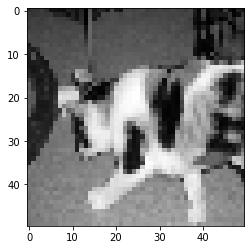

In [42]:
import matplotlib.pyplot as plt

print(training_data.shape)
plt.imshow(training_data[2][0], cmap="gray")
print(training_data[2][1])